<a href="https://colab.research.google.com/github/PedroConst/EQE-002-Otimizacao/blob/main/Exemplos/Programacao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação Linear (*Linear Programming*)

Antes de usar o software GEKKO, é necessário baixar a instalar o pacote através do comando abaixo.

In [ ]:
pip install gekko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 24.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

## ✅ Exemplo:

Uma empresa fabrica dois produtos (`G` e `H`) e possui duas fontes de matéria-prima (`X` e `Y`) disponíveis.

* Cada unidade do produto `G` requer 3 unidades da matéria-prima `X` e 8 unidades da matéria-prima `Y`
* Cada unidade do produto `H` requer 6 unidades da matéria-prima `X` and 4 unidades da matéria-prima `Y`
* A empresa tem um máximo de 30 unidades de matéria-prima `X` e 44 unidades da matéria-prima `Y` disponíveis.
* A empresa deseja maximizar o seu lucro:
 * \\$100 por unidade do produto `G`
 * \\$125 por unidade do produto `H`

Programação Linear (LP) é um método de otimização para resolver sistemas de restrições lineares e objetivos lineares.
Matematicamente, podemos escrever esse problema como:

$\begin{align}\mathrm{maximize} \quad & 100 G + 125 H \\ \mathrm{subject\;to}\quad & 3 G + 6 H\le30 \\ & 8 G + 4 H\le44 \\ & G,H\ge0 \end{align}$

onde $G$ e $H$ são os números de unidades de cada produto a ser produzido, respectivamente.

In [ ]:
from gekko import GEKKO

# Criar o Modelo
m = GEKKO()

# Definir Variáveis de Decisão
G,H = m.Array(m.Var,2,lb=0)

# Definir a Função Objetivo
m.Maximize(100*G+125*H)

# Definir Restrições
m.Equation(3*G+6*H<=30)
m.Equation(8*G+4*H<=44)

# Resolver Otimização
m.solve(disp=False)
Gopt = G.value[0]; Hopt = H.value[0]

# Imprimir a Solução
print(f'Solução Ótima: G = {Gopt:.2f}, H = {Hopt:.2f}')
print(f'Lucro Máximo = $ {-m.options.objfcnval:.2f}')

Solução Ótima: G = 4.00, H = 3.00
Lucro Máximo = $ 775.00


### Visualizar a Solução (Opcional)

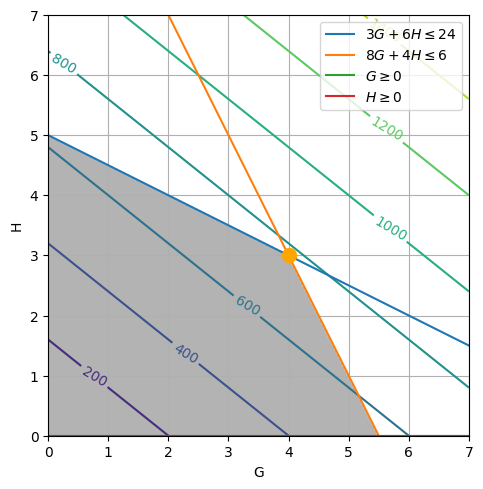

In [ ]:
# Definir os Pontos da Função Objetivo
g = np.linspace(0,7,200)
G,H = np.meshgrid(g,g)
obj = 100*G+125*H

# Plotar Curvas de Contorno da Função Objetivo
CS = plt.contour(G,H,obj)
plt.clabel(CS, inline=1, fontsize=10)

# Definir os Pontos das Restrições
G0 = np.linspace(0, 7, 200)
H0 = (30-3*G0)/6   # 3*G+6*H<=30
H1 = (44-8*G0)/4   # 8*G+4*H<=44
H2 = (G0*0)        # G>=0
H3 = G0*0          # H>=0

# Plotar as Curvas de Restrições
plt.plot(G0, H0, label=r'$3G+6H\leq24$')
plt.plot(G0, H1, label=r'$8G+4H\leq6$')
plt.plot(G0, H2, label=r'$G\geq0$')
plt.plot(G0, H3, label=r'$H\geq0$')

# Sombrear a Região Viável
plt.imshow(((3*G+6*H<=30)&(8*G+4*H<=44)&(G>=0)&(H>=0)).astype(int),
    extent=(G.min(),G.max(),H.min(),H.max()),origin='lower',cmap='Greys',alpha=0.3);

# Marcar o Ponto Ótimo
plt.plot([Gopt],[Hopt],marker='o',color='orange',markersize=10)

# Ajeitar eixos e aparência
plt.xlim(0,7); plt.ylim(0,7); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('G'); plt.ylabel('H')
plt.show()

## ✅ Exemplo:
Resolva o problema de Programa Linear (LP)

$\begin{align}\mathrm{maximize} \quad & x+y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$


In [ ]:
from gekko import GEKKO

# Criar o Modelo
m = GEKKO(remote=False)

# Definir Variáveis de Decisão
x,y = m.Array(m.Var,2,lb=0)

# Definir Função Objetivo
m.Maximize(x+y)

# Definir Restrições
m.Equations([6*x+4*y<=24,
             x+2*y<=6,
             -x+y<=1,
             y<=2])

# Resolver Otimização
m.solve(disp=False)

xopt = x.value[0]; yopt = y.value[0]

# Imprimir Resultados
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 3.0 y: 1.5 obj: 4.5


### Visualizar a Solução (Opcional)

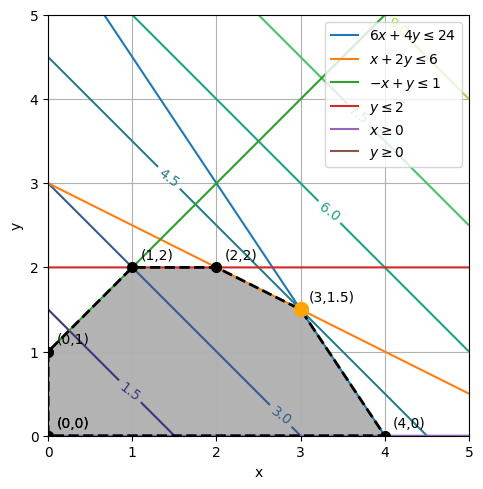

In [ ]:
# Definir os Pontos da Função Objetivo
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = x+y

# Plotar Curvas de Contorno da Função Objetivo
CS = plt.contour(x,y,obj)
plt.clabel(CS, inline=1, fontsize=10)

# Definir os Pontos das Restrições
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0

# Plotar as Curvas de Restrições
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')

# Sombrear a Região Viável
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);

# Marcar os Vértices da Região Viável
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')

# Marcar o Ponto Ótimo
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)

# Ajeitar eixos e aparência
plt.xlim(0,5); plt.ylim(0,5); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()